In [1]:
import sys
sys.path.append("/users/munozr/mycodes")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from data_analysis_codes.tools import Cstyle
plt.style.use(Cstyle.style1)
from data_analysis_codes.tools import LinData
from data_analysis_codes.tools import ReadingTools as RRead

In [2]:
param = RRead.read_parameters('flrw_L1206_t1_N32_EdS_CTD_CosmoPunctureTRY')
Lin = LinData.LinData_Class(param)
fevo = pd.read_table(param['datapath']+'h5_data.csv', delimiter=',')
fc = pd.read_table(param['datapath']+'constraints.csv', delimiter=',')

 read time file


In [3]:
paramGRH = RRead.read_parameters('flrw_L1206_t1_N32_EdS_GRH_CosmoPunctureTRY')
LinGRH = LinData.LinData_Class(paramGRH)
fevoGRH = pd.read_table(paramGRH['datapath']+'h5_data.csv', delimiter=',')
fcGRH = pd.read_table(paramGRH['datapath']+'constraints.csv', delimiter=',')

 read time file


In [4]:
paramGRHeps4 = RRead.read_parameters('flrw_L1206_t1_N32_EdS_GRH_CosmoPunctureTRYeps4')
LinGRHeps4 = LinData.LinData_Class(paramGRHeps4)
fevoGRHeps4 = pd.read_table(paramGRHeps4['datapath']+'h5_data.csv', delimiter=',')
fcGRHeps4 = pd.read_table(paramGRHeps4['datapath']+'constraints.csv', delimiter=',')

 read time file


(1e-11, 0.0002)

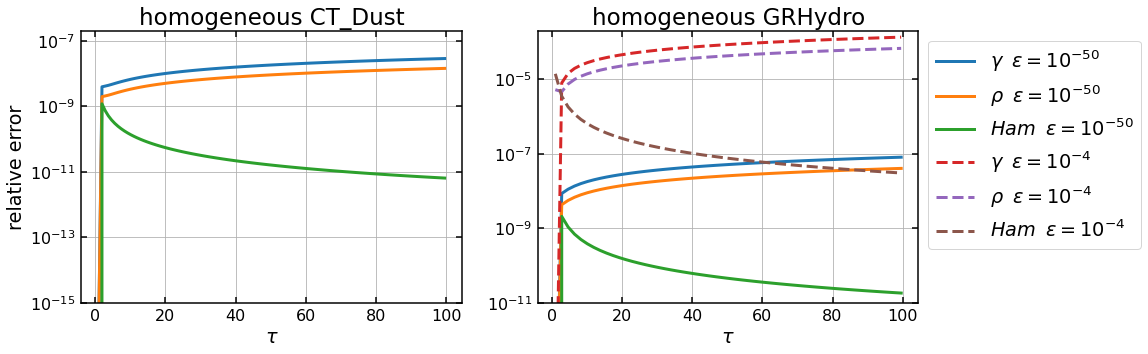

In [8]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.semilogy(fevo['tau_cent'], abs(fevo['gdet_cent']/Lin.evo.a(fevo['tau_cent'])**6 - 1), label=r'$\gamma$')
plt.semilogy(fevo['tau_cent'], abs(fevo['rho_cent']/Lin.evo.rho(fevo['tau_cent']) - 1), label=r'$\rho$')
plt.semilogy(fevo['tau_cent'], abs(fc['Ham_cent']), label=r'$Ham$')
plt.semilogy(fevo['tau_cent'], abs(fevo['Theta_cent']/(3*Lin.evo.Hprop(fevo['tau_cent'])) - 1), label=r'$\Theta$')
plt.grid()
plt.xlabel(r'$\tau$')
plt.ylabel('relative error')
plt.title('homogeneous CT_Dust')
plt.ylim(1e-15, 2e-7)

plt.subplot(122)
plt.semilogy(fevoGRH['tau_cent'], abs(fevoGRH['gdet_cent']/LinGRH.evo.a(fevoGRH['tau_cent'])**6 - 1), label=r'$\gamma\;\;\epsilon=10^{-50}$')
rho = fevoGRH['rho_cent'] * (1 + fevoGRH['eps_cent'])
plt.semilogy(fevoGRH['tau_cent'], abs(rho/LinGRH.evo.rho(fevoGRH['tau_cent']) - 1), label=r'$\rho\;\;\epsilon=10^{-50}$')
plt.semilogy(fevoGRH['tau_cent'], abs(fcGRH['Ham_cent']), label=r'$Ham\;\;\epsilon=10^{-50}$')

plt.semilogy(fevoGRHeps4['tau_cent'], abs(fevoGRHeps4['gdet_cent']/LinGRHeps4.evo.a(fevoGRHeps4['tau_cent'])**6 - 1), linestyle='--', label=r'$\gamma\;\;\epsilon=10^{-4}$')
rho = fevoGRHeps4['rho_cent'] * (1 + fevoGRHeps4['eps_cent'])
plt.semilogy(fevoGRHeps4['tau_cent'], abs(rho/LinGRHeps4.evo.rho(fevoGRHeps4['tau_cent']) - 1), linestyle='--', label=r'$\rho\;\;\epsilon=10^{-4}$')
plt.semilogy(fevoGRHeps4['tau_cent'], abs(fcGRHeps4['Ham_cent']), linestyle='--', label=r'$Ham\;\;\epsilon=10^{-4}$')

plt.grid()
plt.xlabel(r'$\tau$')
plt.legend(bbox_to_anchor=(1,1))
plt.title('homogeneous GRHydro')
plt.ylim(1e-11, 2e-4)

In [10]:
fevo['Theta_cent']

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
104   NaN
105   NaN
106   NaN
107   NaN
108   NaN
Name: Theta_cent, Length: 109, dtype: float64

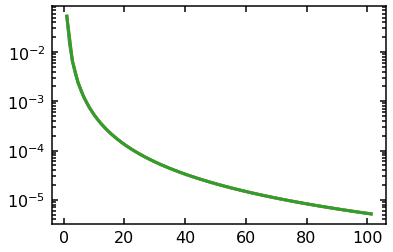

In [13]:
plt.semilogy(fevo['tau_cent'], abs(fevo['rho_cent']), label=r'$\rho$')
plt.semilogy(fevoGRH['tau_cent'], abs(fevoGRH['rho_cent'] * (1 + fevoGRH['eps_cent'])), label=r'$\rho$')
plt.semilogy(fevoGRH['tau_cent'], abs(fevoGRH['rho_cent']), label=r'$\rho$')

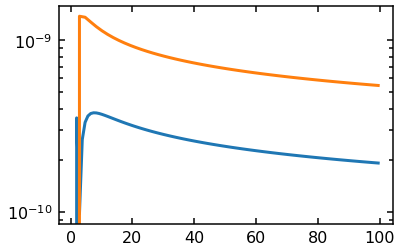

In [5]:
plt.semilogy(fevo['tau_cent'], abs(fevo['dtalp_cent']))
plt.semilogy(fevoGRH['tau_cent'], abs(fevoGRH['dtalp_cent']))

In [9]:
eosw = 0
eoswfac = 3 * (1 + eosw)
h = 0.6737
H0 = h * 1 / 2997.9
tau0_EdS = 2 / ( eoswfac * H0 )
tau = 1
aa0 = ( tau / tau0_EdS )**(2/eoswfac)
redshift = (1 / aa0) - 1

kBdim = 1.17 * 10 ** (-48)
kBc = kBdim * 2997.9
mass = 1
TCMB = 2.725
eps0 = (3/2) * kBc * TCMB / mass
epsIN = eps0 * (1 + redshift)
print(epsIN)

2.960058721745597e-42


In [10]:
K = 1e-4
gamma = 2
epsIN = K * (fevoGRH['rho_cent'][0]**(gamma - 1)) / (gamma - 1)
print(epsIN)

5.305164769729845e-06


In [28]:
kB = 1.380649e-23
c = 2.997925e8
G = 6.674e-11
Mpc = 3.0857e22
H0 = 1e5 * Mpc
kBdim = kB * G * H0 / (c**5)
kBdim

1.1741386023277468e-48

In [29]:
cc = 1
Gc = 1
kBc = kBdim * (cc**4) * 2997.9 / Gc
kBc

3.519950115918352e-45

In [36]:
TCMB = 2.725
m = 1
eps0 = (3/2) * kB * TCMB / m
eps0

5.6434027875e-23

In [37]:
redshift = 20000
epsflrw = eps0 * (1 + redshift)
epsflrw

1.128736991527875e-18

In [ ]:
RRead.